<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./drive/MyDrive/data/California_Houses.csv')

1. LinearRegression(), cross_val_score : avg_rmse

2. Ridge, alpha=10, cross_val_score : avg_rmse

In [ ]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [ ]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet

from sklearn.model_selection import cross_val_score

In [ ]:
target = df.Median_House_Value
data = df.iloc[:, 1:]

lr = LinearRegression()
mse_lr = cross_val_score(lr, data, target, cv = 5, scoring = 'neg_mean_squared_error')
rmse_lr = np.sqrt(-1 * mse_lr)
avg_rmse_lr = np.mean(rmse_lr)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, data, target, scoring = 'neg_mean_squared_error', cv = 5)
rmse = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse)

print('LinearRegression :', avg_rmse_lr, 'Ridge :', avg_rmse)

LinearRegression : 74387.38809713967 Ridge : 74376.72794177957


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler

In [ ]:
alphas = [0.1, 1, 10, 100]

In [ ]:
scale_methods = [StandardScaler(), MinMaxScaler(), (StandardScaler(),
                                                    PolynomialFeatures(degree=2, include_bias=False)),
                 (MinMaxScaler(), PolynomialFeatures(degree=2, include_bias=False))]

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
type(PolynomialFeatures()).__name__

'PolynomialFeatures'

In [ ]:
y_target = df.Median_House_Value
X_data = df.drop(['Median_House_Value', 'Latitude','Longitude'],axis=1)

In [ ]:
X_data

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,1665,374,845,330,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,2.5568,18,697,150,356,114,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,1.7000,17,2254,485,1007,433,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,1.8672,18,1860,409,741,349,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [ ]:
y_target

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: Median_House_Value, Length: 20640, dtype: float64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
result = []
for als in alphas:
    for sm in scale_methods:
        for model in [Ridge(alpha=als), Lasso(alpha=als), ElasticNet(alpha=als, l1_ratio=0.7)]:
            if type(sm) == tuple :
                pipe = make_pipeline(sm[0], sm[1], model)
                sm_name = type(sm[0]).__name__[:4]+'+'+type(sm[1]).__name__[:4]
            else:
                pipe = make_pipeline(sm, model)
                sm_name = type(sm).__name__[:4]
            neg_mse_scores = cross_val_score(pipe, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
            avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
            result.append((str(als), sm_name, type(model).__name__, avg_rmse))

In [ ]:
result

[('0.1', 'Stan', 'Ridge', 75514.41507890013),
 ('0.1', 'Stan', 'Lasso', 75477.93425139078),
 ('0.1', 'Stan', 'ElasticNet', 72162.69818893766),
 ('0.1', 'MinM', 'Ridge', 75376.76052518019),
 ('0.1', 'MinM', 'Lasso', 75474.1437519377),
 ('0.1', 'MinM', 'ElasticNet', 91577.43176884756),
 ('0.1', 'Stan+Poly', 'Ridge', 91898.64881561878),
 ('0.1', 'Stan+Poly', 'Lasso', 76319.93995434517),
 ('0.1', 'Stan+Poly', 'ElasticNet', 70512.80561001715),
 ('0.1', 'MinM+Poly', 'Ridge', 72588.18221466732),
 ('0.1', 'MinM+Poly', 'Lasso', 75569.59770800523),
 ('0.1', 'MinM+Poly', 'ElasticNet', 84106.49360864397),
 ('1', 'Stan', 'Ridge', 75413.28377422411),
 ('1', 'Stan', 'Lasso', 75463.34732942712),
 ('1', 'Stan', 'ElasticNet', 76185.45533783147),
 ('1', 'MinM', 'Ridge', 74555.82771194975),
 ('1', 'MinM', 'Lasso', 75425.61208821903),
 ('1', 'MinM', 'ElasticNet', 112529.46345494673),
 ('1', 'Stan+Poly', 'Ridge', 76617.36805614873),
 ('1', 'Stan+Poly', 'Lasso', 76245.84567130131),
 ('1', 'Stan+Poly', 'Elast

#LogisticRegression

- 기본은 회귀 -> 분류에 사용

- 선형회귀에서 산출된 값을 -> log-odds 로 변환 -> 시그모이드 함수 값으로 산출

- 계산된 시그모이드 함수 값을 확률로 간주하여 (0, 1)로 분리 한다.

1. 로지스틱 함수

# $$ \pi (x) = {1 \over 1+ e^{-(\beta_0 + \beta_1 x)} }$$

여기서,

# $$ \pi (x) = 1이 \ 될\ 확률 $$

odds =  승산비 = (1이 될 확률) / (0이 될 확률)

# $$ odds = {\pi (x) \over 1 - \pi (x)}$$

# $${\pi (x) \over 1 - \pi (x)} = \frac{1 \over 1+e^{-(\beta_0+\beta_1 x)}}{1-{1 \over 1+e^{-(\beta_0+\beta_1 x)}}}
=e^{(\beta_0 + \beta_1 x)}$$

odds 에 ln을 취해 보자

# $$ ln (odds) = ln \left ({\pi \over 1-\pi} \right) = \beta_0 + \beta_1 x \quad : Logit  $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
beta_x = np.arange(-5, 5, 0.1)
y = 1 / (1 + np.exp((-1)*beta_x))

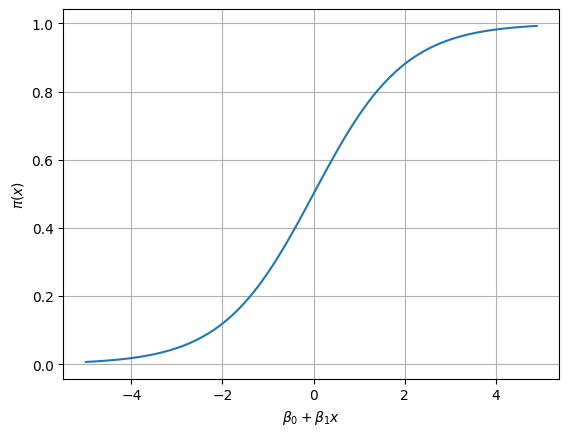

In [ ]:
plt.plot(beta_x, y)
plt.xlabel(r'$\beta_0 + \beta_1 x$')
plt.ylabel(r'$\pi (x)$')
plt.grid()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target)

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred)

0.972027972027972

주요 파라미터

penalty : 'l2'

C : $1 \over \alpha$, C 값이 작을수록 규제가 크다

In [ ]:
params = {'C':[0.01, 0.1, 1, 3, 5, 10]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lr_clf = LogisticRegression()

In [ ]:
grid = GridSearchCV(lr_clf, param_grid = params, scoring='accuracy', cv=3)
grid.fit(data_scaled, cancer.target)
print(grid.best_params_)
grid.best_score_

{'C': 1}


0.975392184164114

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy_score(y_test, lr_pred)

0.9230769230769231

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(cancer.data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target)

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
accuracy_score(y_test, lr_pred)

0.965034965034965

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
def get_frc(y_test, pred=None, pred_probas = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_aucs = roc_auc_score(y_test, pred_probas)
    print(confusion, accuracy, precision, recall, f1, roc_aucs)

In [ ]:
ls ./drive/MyDrive/data/creditcard*

./drive/MyDrive/data/creditcard.csv


In [ ]:
card = pd.read_csv('./drive/MyDrive/data/creditcard.csv')

In [ ]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
card.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<ipython-input-60-bf69340decb9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(card.Amount)


<Axes: xlabel='Amount', ylabel='Density'>

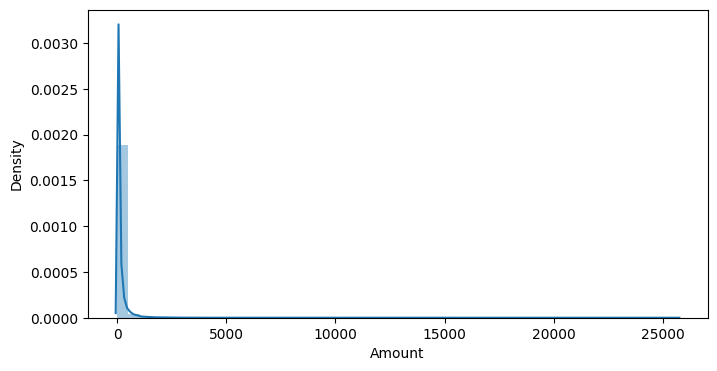

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.distplot(card.Amount)

1. Amount 에 대해

StandardScaler, => Amounut_st, v1~v28 =>get_frc

log1p 변환, => Amount_log, V1~v28 => get_frc

아무 변환 안한 경우 => get_frc

평가 : get_frc 로 평가

In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
X = card.iloc[:, 1:29]

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [ ]:
card.Amount.values.reshape(-1, 1).shape

(284807, 1)

In [ ]:
scaler=StandardScaler()
X['Amount_st'] = scaler.fit_transform(card.Amount.values.reshape(-1,1))

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_st
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
y = card.Class

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=156)

In [ ]:
y_train.value_counts(normalize=True)*100, y_test.value_counts(normalize=True)*100

(0    99.827075
 1     0.172925
 Name: Class, dtype: float64,
 0    99.827955
 1     0.172045
 Name: Class, dtype: float64)

In [ ]:
def model_run(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=156)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    pred_probas = clf.predict_proba(X_test)[:, 1]
    get_frc(y_test, pred=pred, pred_probas=pred_probas)

In [ ]:
model_run(X, y)

[[56857     7]
 [   46    52]] 0.9990695551420246 0.8813559322033898 0.5306122448979592 0.6624203821656052 0.96257701870844


In [ ]:
X = card.iloc[:, 1:29]
X['Amount_log'] = np.log1p(card.Amount)

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


In [ ]:
model_run(X, y)

[[56857     7]
 [   47    51]] 0.9990519995786665 0.8793103448275862 0.5204081632653061 0.653846153846154 0.9627395978087352


#회귀트리

- 회귀 트리는 리트 노드에 속한 데이터의 평균값을 구해 회귀 예측값을 산출한다.

- 결정트리 : 지니계수가 낮게 하는 피처를 기준으로 분할

- 회귀트리 : RSS 를 낮게 하는 피처를 기준으로 분할

< 파이썬 머신러닝 완벽 가이드, 권철민, 위키북스>

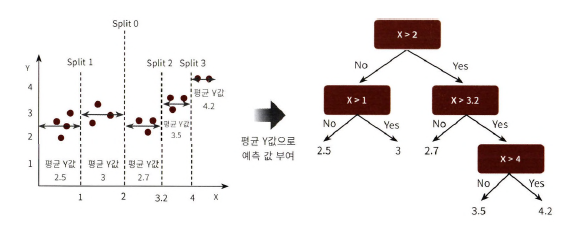

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ls ./drive/MyDrive/data/bos*

./drive/MyDrive/data/boston_house.csv


In [ ]:
boston_df = pd.read_csv('./drive/MyDrive/data/boston_house.csv')

In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    int64  
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
y_target = boston_df.PRICE

In [ ]:
X_data = boston_df.iloc[:, 1:-1]

In [ ]:
X_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
rf = RandomForestRegressor(n_estimators=1000, random_state=156)

In [ ]:
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse=np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse)

In [ ]:
avg_rmse

4.413897454592293

In [ ]:
rmse

array([2.8244662 , 3.57036282, 4.54365009, 6.80317987, 4.3278283 ])

In [ ]:
rf.__class__.__name__

'RandomForestRegressor'

In [ ]:
def get_model_cv_pred(model, X_data, y_target):
    neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse=np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse)
    print('====', model.__class__.__name__, '====')
    print('avg_rmse : ', avg_rmse)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
dt = DecisionTreeRegressor(max_depth=4)
rf = RandomForestRegressor(n_estimators=1000)
gb = GradientBoostingRegressor(n_estimators=1000)
xgb_r = XGBRegressor(n_estimators=1000)
lgbm_r = LGBMRegressor(n_estimators=1000)

models = [dt, rf, gb, xgb_r, lgbm_r]

for model in models:
    get_model_cv_pred(model, X_data, y_target)

==== DecisionTreeRegressor ====
avg_rmse :  4.406317020255169
==== RandomForestRegressor ====
avg_rmse :  4.426137508568059
==== GradientBoostingRegressor ====
avg_rmse :  4.433853429184858
==== XGBRegressor ====
avg_rmse :  4.435249722104748
==== LGBMRegressor ====
avg_rmse :  4.4360716493288646


In [ ]:
import seaborn as sns

In [ ]:
rf.fit(X_data, y_target)

RandomForestRegressor(n_estimators=1000)

coef_, ---> feature_importances_

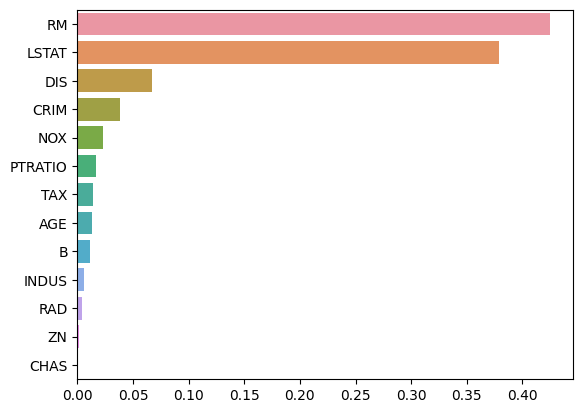

In [ ]:
ftr_s = pd.Series(data=rf.feature_importances_, index = X_data.columns)
ftr_s = ftr_s.sort_values(ascending=False)
sns.barplot(x=ftr_s, y=ftr_s.index)
plt.show()

In [ ]:
df = boston_df[['RM']]
df['PRICE'] = y_target.values

<ipython-input-113-632627cb4e52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRICE'] = y_target.values


In [ ]:
df

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [ ]:
df_s = df.sample(n=100, random_state=0)

In [ ]:
df_s.shape

(100, 2)

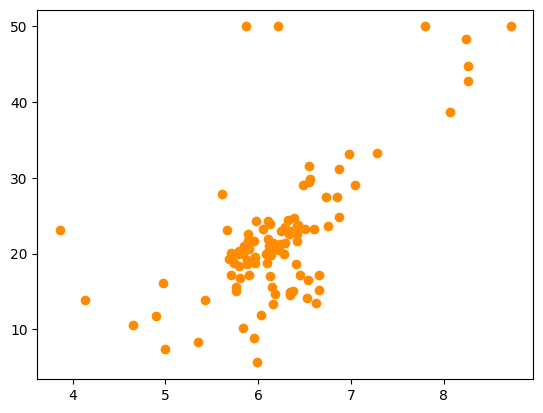

In [ ]:
plt.figure()
plt.scatter(df_s.RM, df_s.PRICE, c='darkorange')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
rf2 = DecisionTreeRegressor(max_depth=2)
rf7 = DecisionTreeRegressor(max_depth=7)

X = df_s.RM.values.reshape(-1, 1)
y = df_s.PRICE.values.reshape(-1, 1)

In [ ]:
X.shape, y.shape

((100, 1), (100, 1))

In [ ]:
lr.fit(X, y)
rf2.fit(X, y)
rf7.fit(X, y)

DecisionTreeRegressor(max_depth=7)